In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [13]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


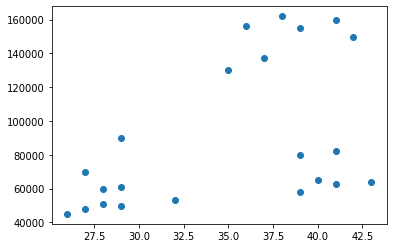

In [21]:
plt.scatter(df['Age'],df['Income($)'])

In [22]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


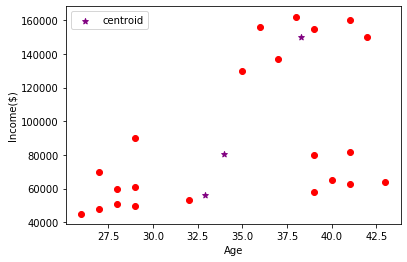

In [42]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1["Income($)"],color="red")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="red")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [56]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']= scaler.transform(df[['Income($)']])

scaler.fit(df.Age)
df.Age=Scaler.transform(df.Age)
df

ValueError: Expected 2D array, got 1D array instead:
array=[27. 29. 29. 28. 42. 39. 41. 38. 36. 35. 37. 26. 27. 28. 29. 32. 40. 41.
 43. 39. 41. 39.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
df.columns

Index(['Name', 'Age', 'Income($)', 'cluster'], dtype='object')

In [65]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [77]:
df['cluster']=y_predicted
df.drop(['cluster'],axis=1,inplace=True)
df

,Name,Age,Income($),cluster2
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,2
8,Brad,36,0.948718,2
9,Angelina,35,0.726496,2


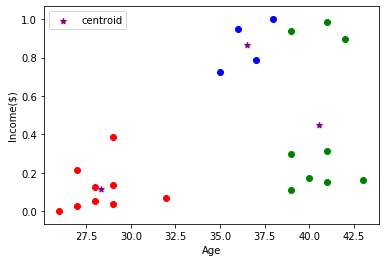

In [81]:
df1=df[df.cluster2==0]
df2=df[df.cluster2==1]
df3=df[df.cluster2==2]

plt.scatter(df1.Age,df1["Income($)"],color="red")
plt.scatter(df2.Age,df2["Income($)"],color="green")
plt.scatter(df3.Age,df3["Income($)"],color="blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [82]:
km.cluster_centers_

array([[28.33333333,  0.11633428],
       [40.55555556,  0.44824311],
       [36.5       ,  0.86538462]])

In [88]:
k_rng=range(1,10)
see=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    see.append(km.inertia_)

In [90]:
see

[734.1763833270244,
 92.54628677464532,
 46.51741260217044,
 28.51128719531497,
 17.617425944188767,
 10.600399347407892,
 8.005754011736917,
 5.469648379477439,
 4.1505405800277595]

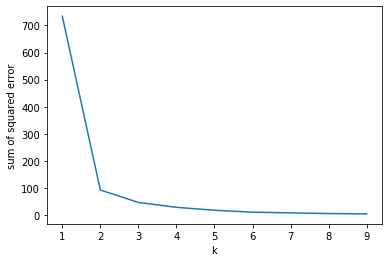

In [97]:
plt.xlabel('k')
plt.ylabel("sum of squared error")
plt.plot(k_rng,see)
